In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
survived = df[df['Survived'] == 1]['Survived']
died = df[df['Survived'] == 0]['Survived']

ddf = pd.DataFrame(data=[[len(survived)], [len(died)]], index=['survived', 'died'])

ddf.to_csv('titanic_survived_died_freq.csv')
ddf.head()

,0
survived,342
died,549


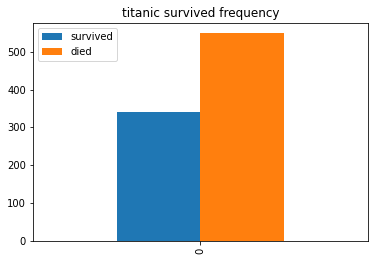

In [3]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

pd.DataFrame(data=[[len(survived), len(died)]], columns=['survived', 'died']).plot.bar(ax=ax)
ax.set(title='titanic survived frequency', xlabel='', ylabel='')
fig.savefig('hist.png')

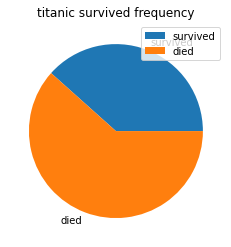

In [4]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ddf.plot.pie(subplots=True, ax=ax)
ax.set(title='titanic survived frequency', xlabel='', ylabel='')
fig.savefig('pie.png')

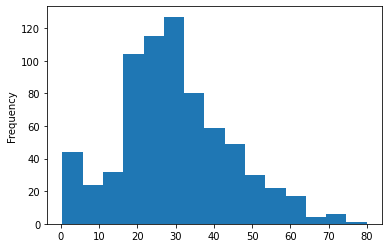

In [5]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
df['Age'].plot.hist(bins=15, ax=ax)
fig.savefig('age_dist.png')

<AxesSubplot:ylabel='Frequency'>

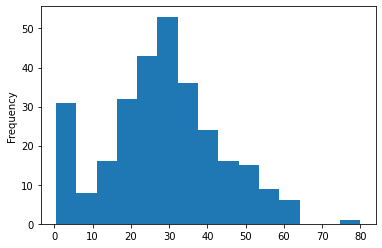

In [6]:
df[df['Survived'] == 1]['Age'].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

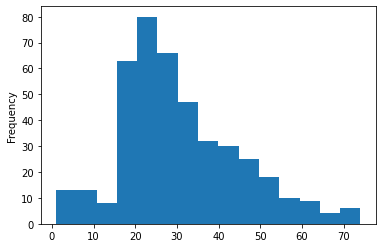

In [7]:
df[df['Survived'] == 0]['Age'].plot.hist(bins=15)

In [8]:
df[df['Survived'] == 1]['Age'].to_csv('titanic_age_survived.csv')
df[df['Survived'] == 0]['Age'].to_csv('titanic_age_survived.csv')
df['Age'].to_csv('titanic_age_both.csv')

In [9]:
_fdf = ((df[['Age']] // 5)  * 5 ).value_counts()

age = list(map(lambda x: int(x[0]), _fdf.index))
age_s = list(map(lambda x: f"{int(x[0])}-{int(x[0])+5}", _fdf.index))
_fdf.values

fdf = pd.DataFrame(data={'age': age, 'age_s': age_s, 'freq': _fdf.values, 'rel freq': _fdf.values / sum(_fdf.values)})
fdf.sort_values(by='age', inplace=True)
__fdf = fdf[['age_s', 'freq', 'rel freq']].reset_index(drop=True)
__fdf

,age_s,freq,rel freq
0,0-5,40,0.056022
1,5-10,22,0.030812
2,10-15,16,0.022409
3,15-20,86,0.120448
4,20-25,114,0.159664
5,25-30,106,0.148459
6,30-35,95,0.133053
7,35-40,72,0.100840
8,40-45,48,0.067227
9,45-50,41,0.057423


In [10]:
__fdf.to_csv('age_freq.csv')

In [34]:
age = df['Age'].dropna()
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

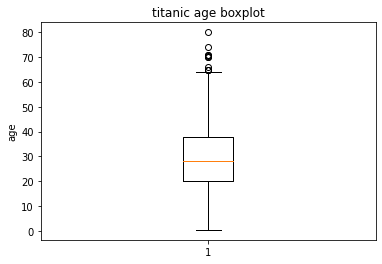

In [35]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.boxplot(age)
ax.set(title='titanic age boxplot', xlabel='', ylabel='age')
fig.savefig('boxplot.png')

In [27]:
age.median()

28.0

In [28]:
age.quantile(0.75) - age.quantile(0.25) 

17.875

In [43]:
std = age.std()
mean = age.mean()
total = len(age)

_1stddev = len(list(filter(lambda x: mean-std < x < mean+std, age)))

_1stddev / total

0.7226890756302521

In [44]:
_2stddev = len(list(filter(lambda x: mean-std*2 < x < mean+std*2, age)))
_2stddev / total

0.9593837535014006

In [46]:
_3stddev = len(list(filter(lambda x: mean-std*3 < x < mean+std*3, age)))
_3stddev / total

0.9971988795518207

In [30]:
total

891

In [53]:
mean-std*2, mean+std*2

(0.646122982390736, 58.752112311726904)